# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.2 MB/s eta 0:00:0031m19.7 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 14.9 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.0
    Uninstalling setuptools-65.5.0:
      Successfully uninstalled setuptools-65.5.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 11.3 MB/s eta 0:00:0031m11.5 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080016 sha256=ab90b5026c72d508a43f0b5d35aa250ea94fb1a0809854cf0412379e37d2a27e
  Stored in directory: /Users/bhavya/Library/Caches/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p ./.kaggle
!touch ./.kaggle/kaggle.json
!chmod 600 ./.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "bhavyasingh2611"
kaggle_key = "<API_KEY>"

# Save API token the kaggle.json file
with open("./.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [7]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/Users/bhavya/.pyenv/versions/3.10.14/envs/udacity/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [39]:
save_path =  'AutoGluonModels/'

processed_data = train.drop(columns=["casual", "registered"])

predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error", path=save_path).fit(
    processed_data, presets='best_quality', time_limit=600
)

Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutoGluonModels/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 157 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 443 seconds.
Start

### Review AutoGluon's training run with ranking of models that did the best.

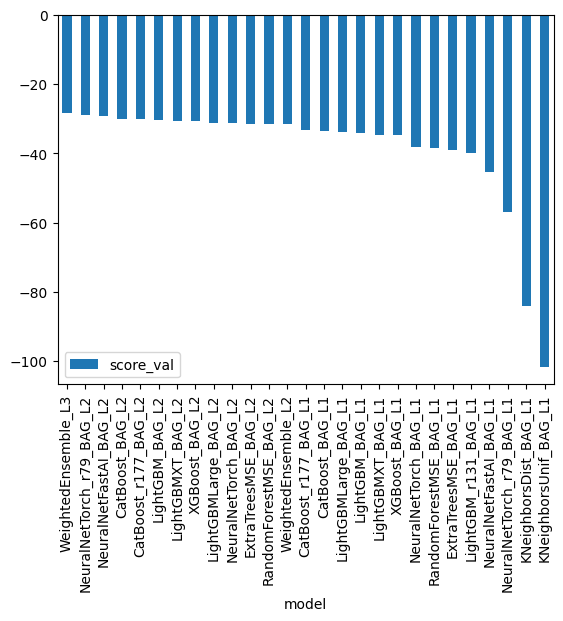

In [41]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

In [18]:
predictions = predictor.predict(test)
predictions.head()

0    26.940968
1    40.839783
2    46.299885
3    50.430595
4    52.595055
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [19]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.258057
std        88.769630
min         2.801253
25%        22.471813
50%        66.363739
75%       167.637054
max       349.819824
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [23]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### Initial score of `1.76400`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>, <Axes: >]], dtype=object)

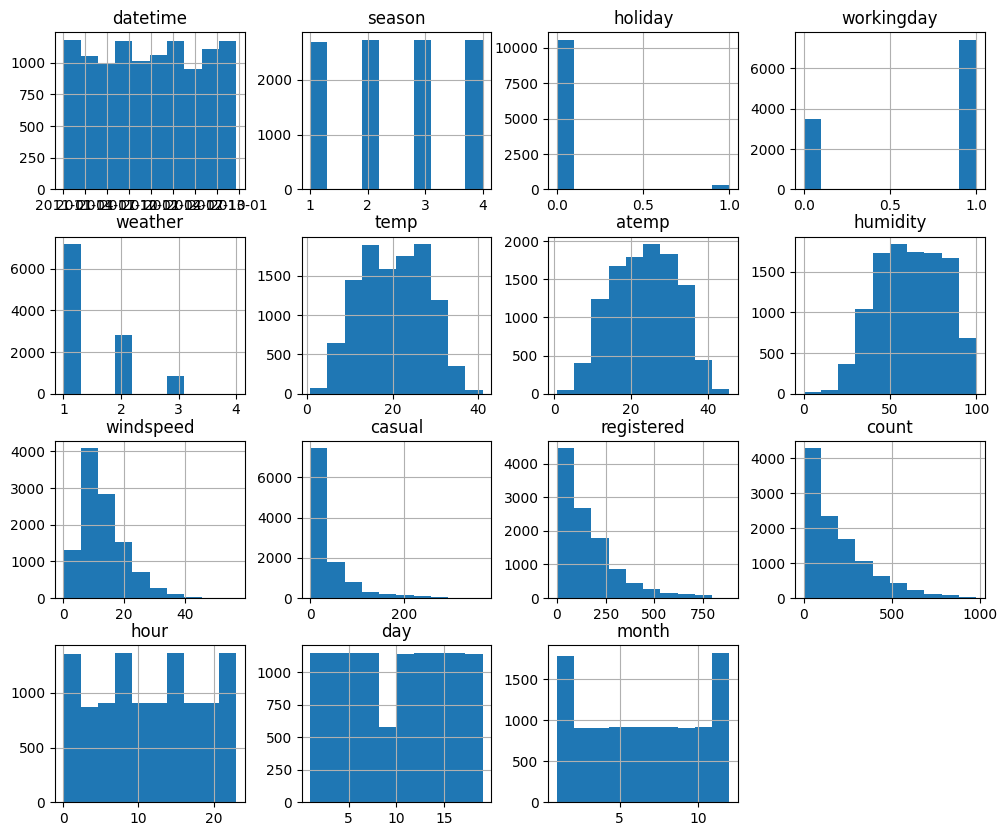

In [26]:
temp = pd.to_datetime(train['datetime'])

train['hour'] = temp.dt.hour
train['day'] = temp.dt.day
train['month'] = temp.dt.month

train.hist(figsize=(12, 10))

In [6]:
# create a new feature
train["climate"] = train["weather"] + train["windspeed"]
test["climate"] = test["weather"] + test["windspeed"]

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [7]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [16]:
# View are new feature
temp = pd.to_datetime(train['datetime'])
temp2 = pd.to_datetime(test['datetime'])

train['hour'] = temp.dt.hour
test['hour'] = temp2.dt.hour
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,climate,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1.0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1.0,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1.0,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1.0,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1.0,4


array([[<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'climate'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >]], dtype=object)

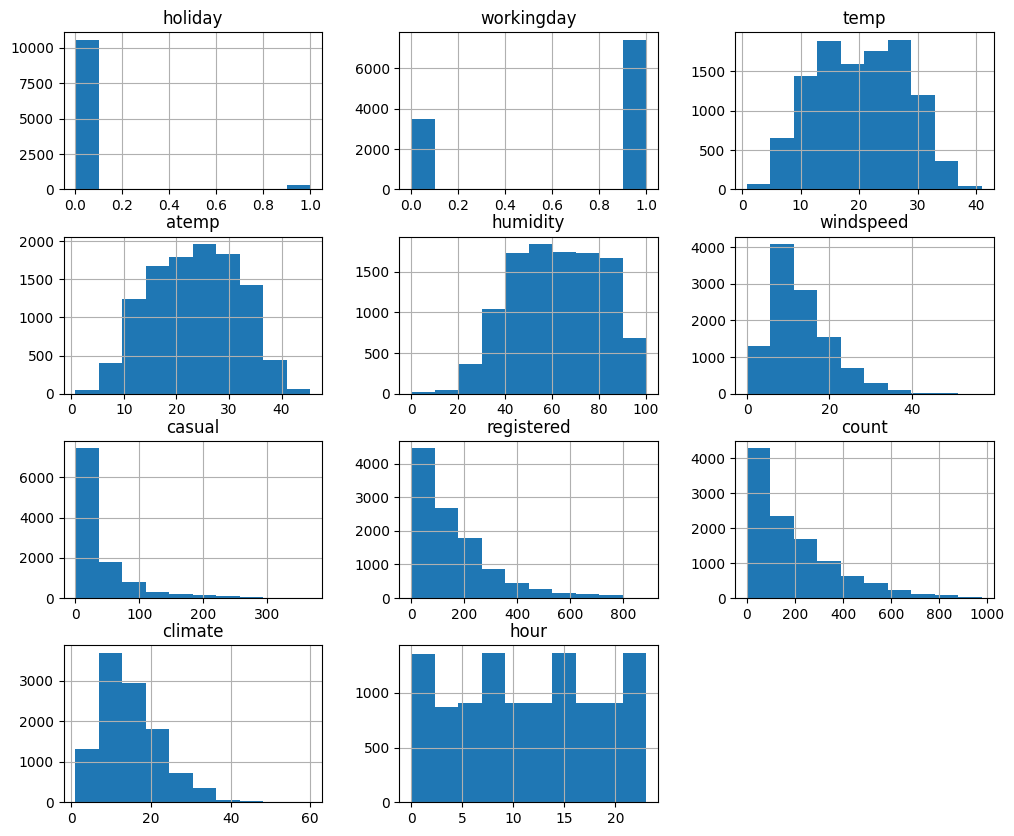

In [11]:
train.hist(figsize=(12, 10))

## Step 5: Rerun the model with the same settings as before, just with more features

In [13]:
processed_data = train.drop(columns=["casual", "registered"])
save_path =  'AutoGluonModelsv2/'


predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error", path=save_path).fit(
    processed_data, presets='best_quality', time_limit=600
)

Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutoGluonModelsv2/ds_sub_fit/sub_fit_ho.
2024-05-08 02:41:12,718	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
Running

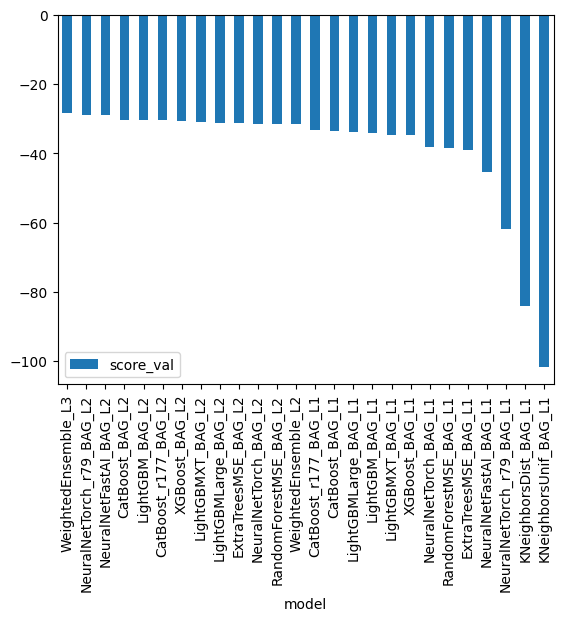

In [42]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [18]:
predictions = predictor_new_features.predict(test)
predictions.head()

predictions.describe()

count    6493.000000
mean      128.451462
std       106.002304
min         1.180010
25%        50.850014
50%       104.044373
75%       172.829498
max       731.862427
Name: count, dtype: float64

In [20]:
submission_new_features = pd.read_csv("sampleSubmission.csv")
submission_new_features.head()

submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.80241`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [30]:
hyperparameters = {
    'GBM': {'num_boost_round': 100, 'learning_rate': 0.1, 'max_depth': 10},
    'RF': {'n_estimators': 100, 'max_depth':10 }
}

hyperparameter_tune_kwargs = {
    'num_trials': 10,
    'search_strategy': 'bayesopt',
    'scheduler' : 'local',
    'searcher': 'random',
    'num_folds': 5,
    'verbosity': 2
}

processed_data = train.drop(columns=["casual", "registered"])
save_path =  'AutoGluonModelsv3/'


predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error", path=save_path).fit(
    processed_data, presets='best_quality', time_limit=600, hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutoGluonModelsv3/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 53 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 547 seconds.
Star

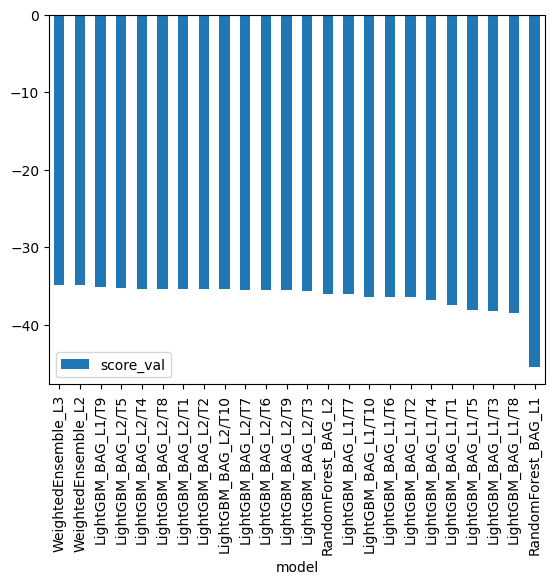

In [45]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [32]:
predictions = predictor_new_hpo.predict(test)

predictions.describe()

count    6493.000000
mean      192.223709
std       174.449158
min         0.154196
25%        45.859760
50%       150.949997
75%       285.338715
max       881.530029
Name: count, dtype: float64

In [33]:
submission_new_hpo = pd.read_csv("sampleSubmission.csv")
submission_new_hpo.head()

submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.46813`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

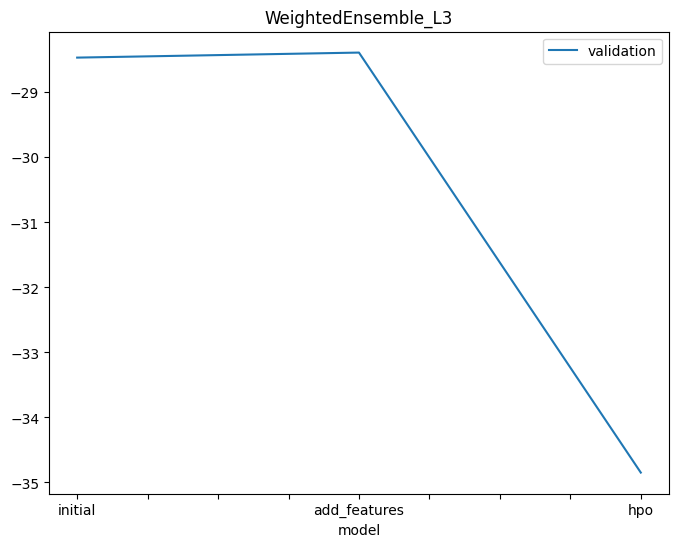

In [48]:
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "validation": [-28.4678, -28.3905, -34.8493]
    }
).plot(x="model", y="validation", figsize=(8, 6), title="WeightedEnsemble_L3").get_figure()
fig.savefig('model_validation_score.png')

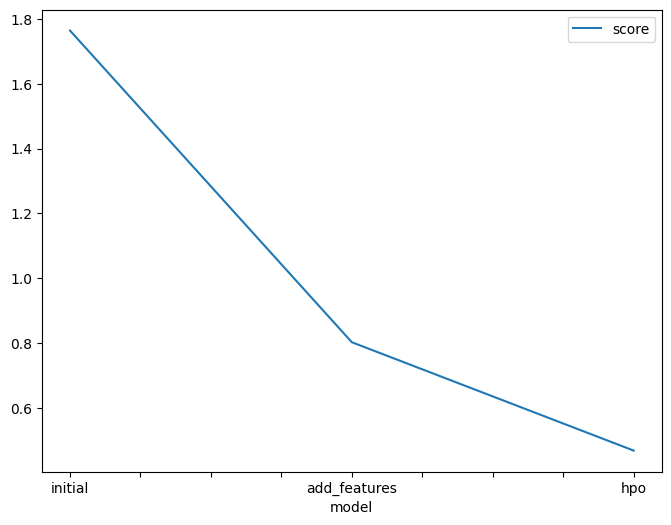

In [35]:
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.76400, 0.80241, 0.46813]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

### Hyperparameter table

In [36]:
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "num_boost_round": ['default', 'default', 100],
    "num_trials": ['default', 'default', 10],
    "num_folds": ['default', 'default', 5],
    "searcher": ['default', 'default', 'random'],
    "score": [1.76400, 0.80241, 0.46813]
})

,model,num_boost_round,num_trials,num_folds,searcher,score
0,initial,default,default,default,default,1.76400
1,add_features,default,default,default,default,0.80241
2,hpo,100,10,5,random,0.46813
